<Figure size 1500x1000 with 0 Axes>

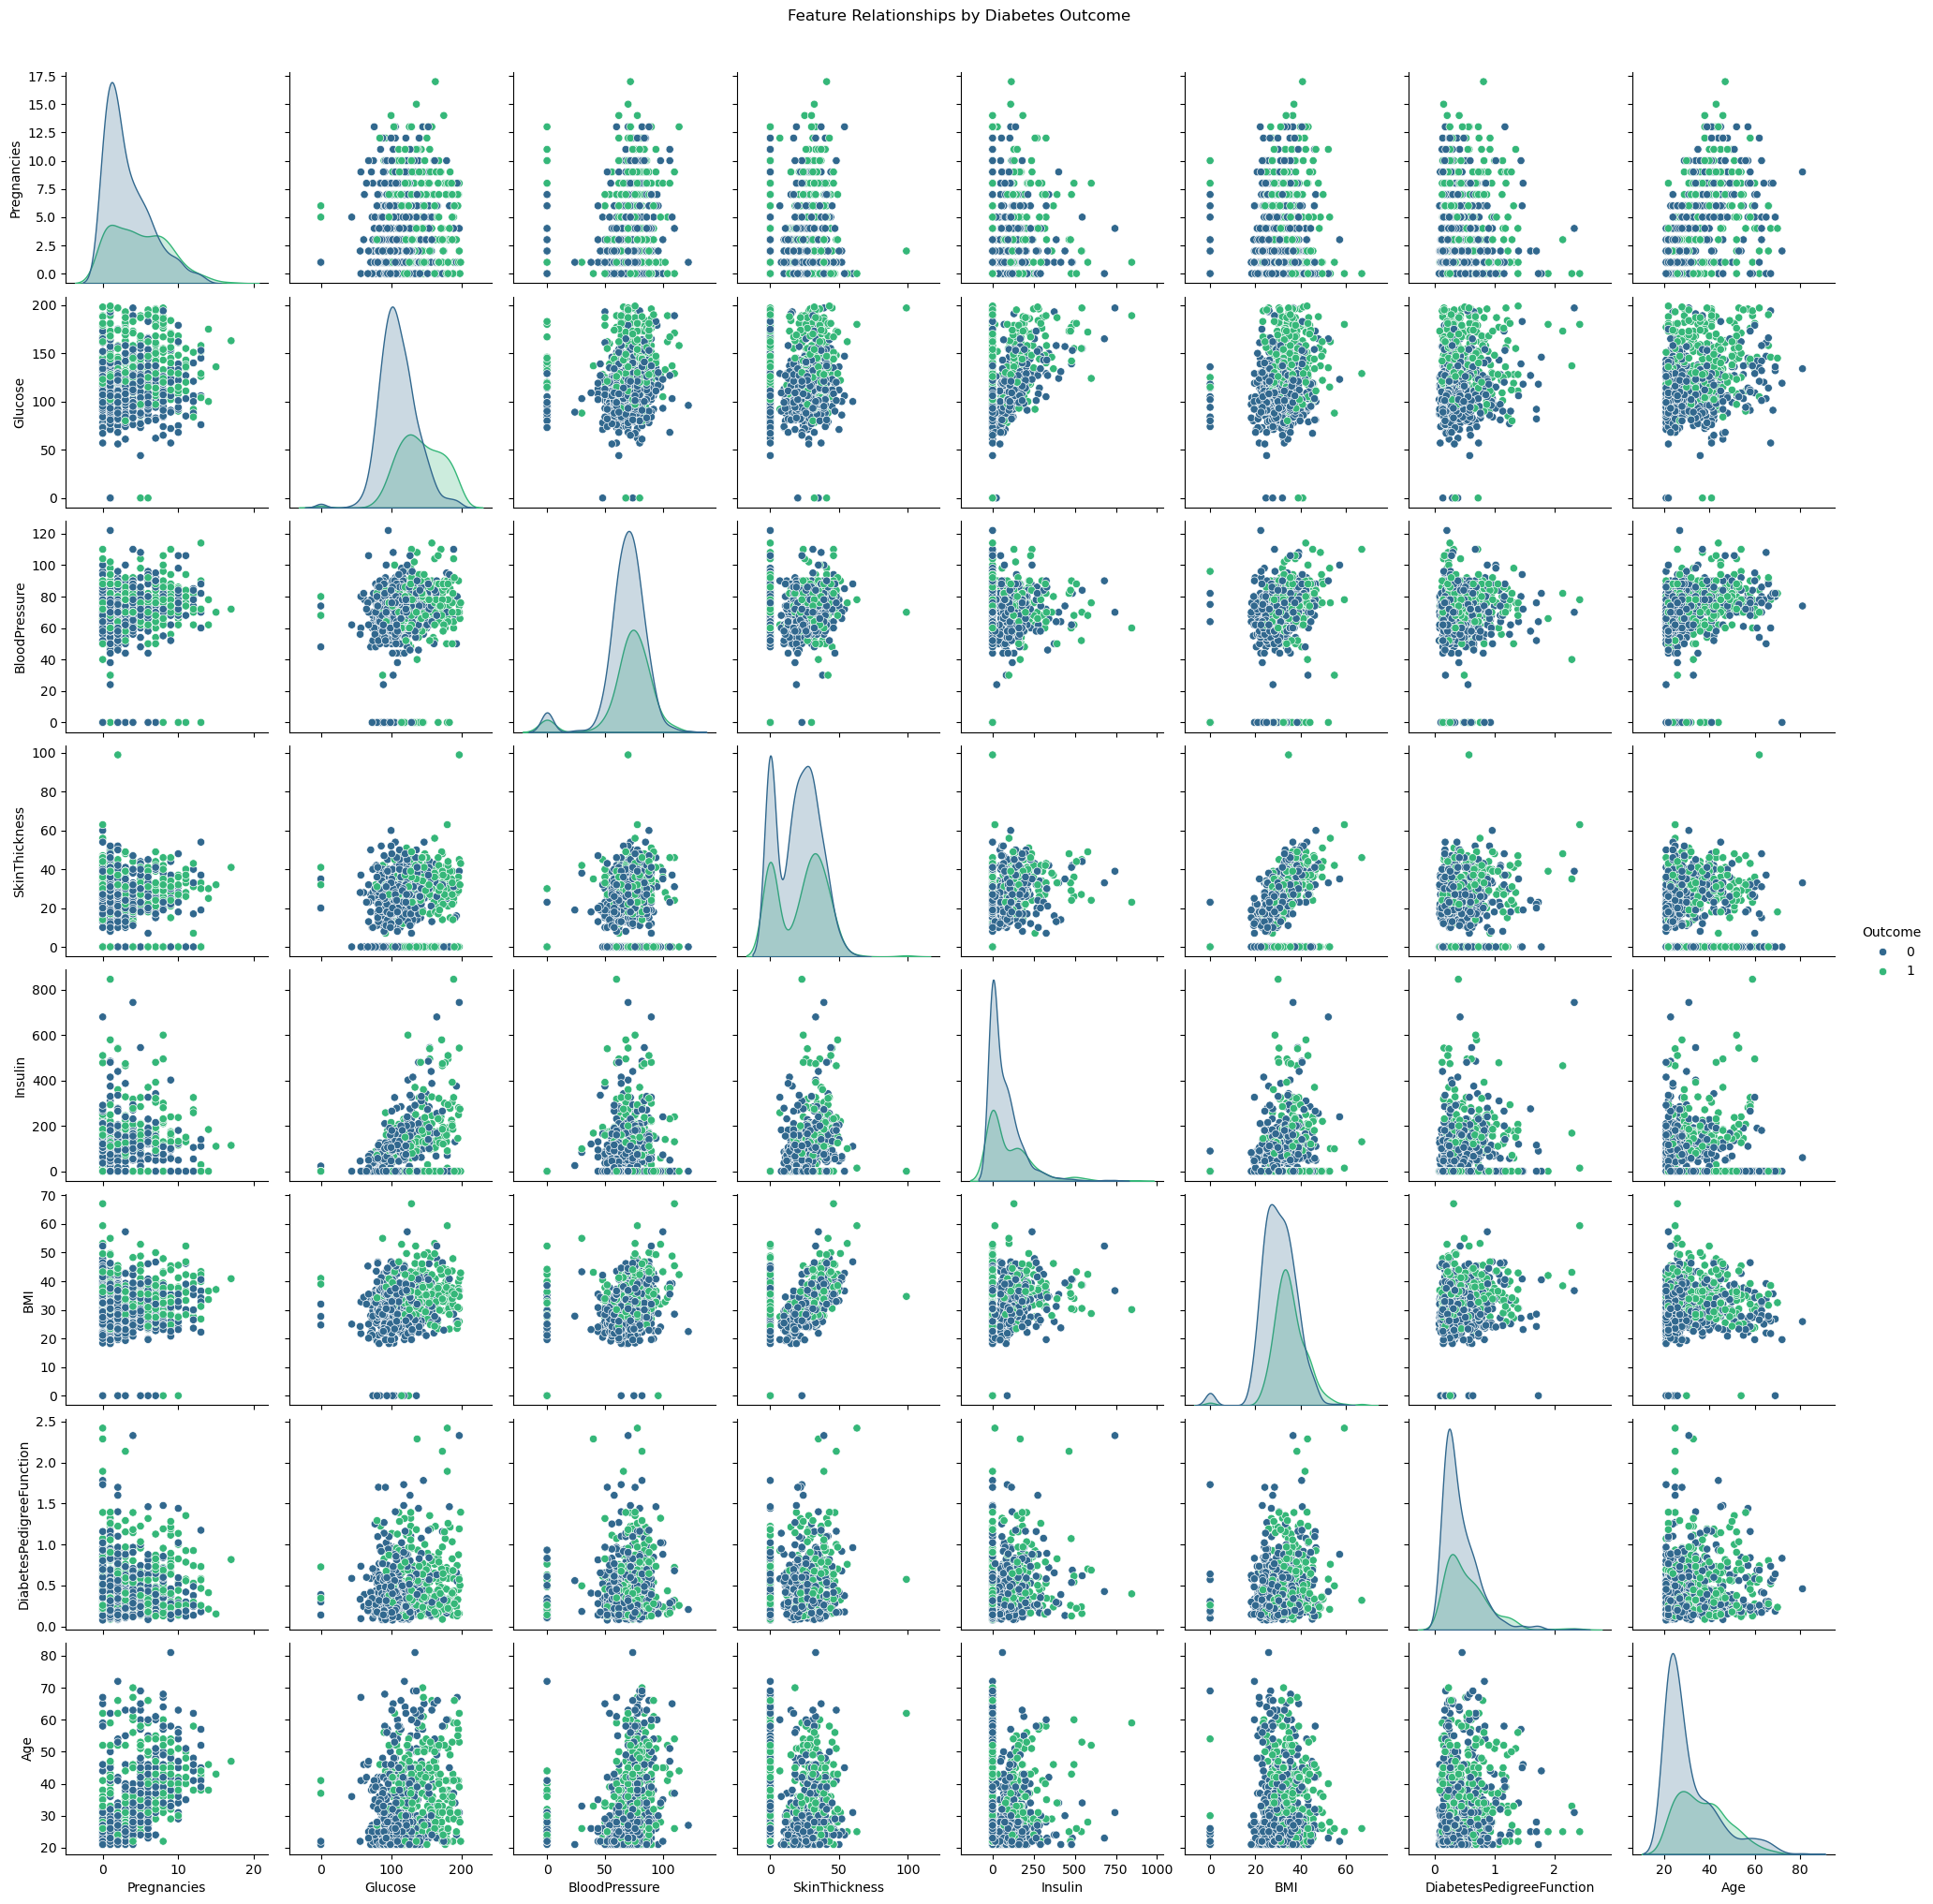

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



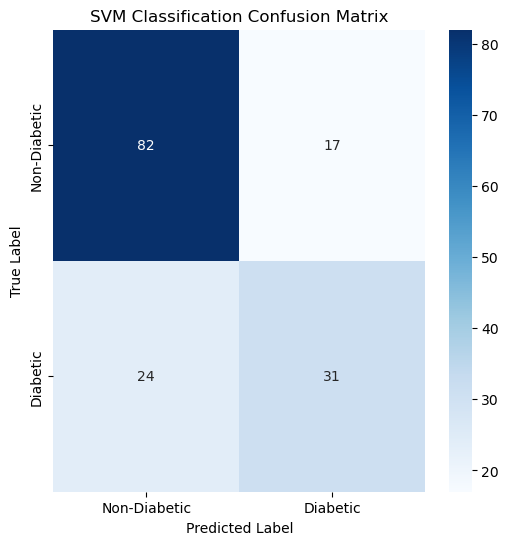

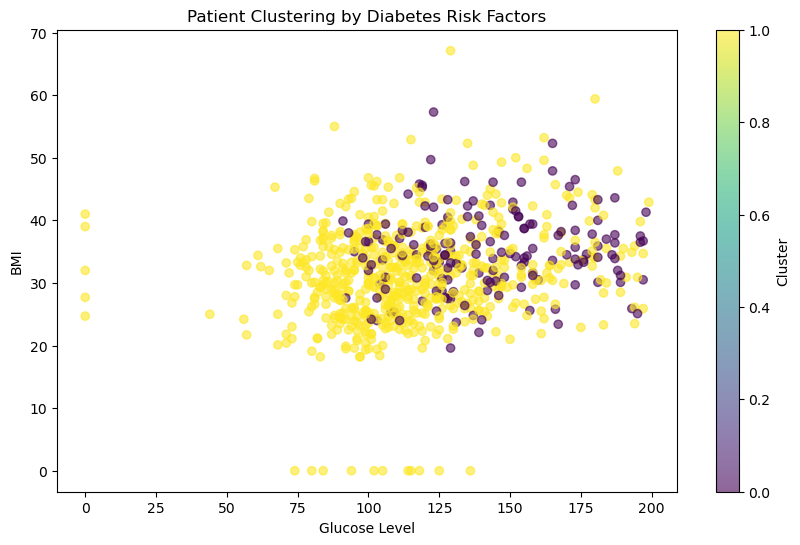

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans  # For supplementary visualization

# Load dataset (PIMA Diabetes Dataset)

df = pd.read_csv("diabetes.csv")

# Data Exploration Visualization
plt.figure(figsize=(15,10))
sns.pairplot(df, hue='Outcome', palette='viridis')
plt.suptitle('Feature Relationships by Diabetes Outcome', y=1.02)
plt.show()

# Data Preprocessing
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM Model Training
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('SVM Classification Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



# Supplementary K-means Clustering Visualization (Risk Group Identification)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X['Glucose'], X['BMI'], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.title('Patient Clustering by Diabetes Risk Factors')
plt.colorbar(label='Cluster')
plt.show()
